In [30]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

#we are going to connect our database

conn = sqlite3.connect(r'C:\Users\Christos\Desktop\Data Analysis project\Data_Analysis_Projects_for_Portofolio\DATA_ANALYSIS_PROJECT_WSDA MUSIC\WSDA_Dataset\WSDA_Music.db')


#Now we have to load each table into a separate DataFrame. We know that our database contains 11 tables.

df_album = pd.read_sql_query("SELECT * FROM Album", conn)
df_artist = pd.read_sql_query("SELECT * FROM Artist", conn)
df_customer = pd.read_sql_query("SELECT * FROM Customer", conn)
df_employee = pd.read_sql_query("SELECT * FROM Employee", conn)
df_invoice = pd.read_sql_query("SELECT * FROM Invoice", conn)
df_invoice_line = pd.read_sql_query("SELECT * FROM InvoiceLine", conn)
df_media_type = pd.read_sql_query("SELECT * FROM MediaType", conn)
df_playlist = pd.read_sql_query("SELECT * FROM Playlist", conn)
df_playlist_track = pd.read_sql_query("SELECT * FROM PlaylistTrack", conn)
df_track = pd.read_sql_query("SELECT * FROM Track", conn)
df_genre = pd.read_sql_query("SELECT * FROM Genre", conn)

#Ok no error came up, which is good. Let's see if our dataframes created.


In [7]:
#Let's see if our dataframe has created!

print(df_album.head())


#Perfect! Now we can start with our analysis.

   AlbumId                    Title  ArtistId
0        1  Vector Vixens Volume II         1
1        2        World Class Chill         2
2        3           Critical Heart         2
3        4           Tech Bass Life         1
4        5        Action After Life         3


In [ ]:
#As you can see in the description of my project, we have some objectives! Let's make a small recap. 

#1. Customers Buying Two Tracks for $0.99 Each
#2. Most Common Billing Countries
#3. Total Revenue Over Time
#4. Best Selling Albums
#5. Customer Demographics and Buying Patterns
#6. Top Selling Artists
#7. Most Popular Genres
#8. Sales Performance by Employee
#9. Employees Responsible for the Highest Individual Sales
#10. Average Invoice Totals by City
#11. City Performance Against Global Average Sales
#12. Playlist Popularity
#13. Selling Tracks per Country
#14. Invoices Below Average Total
#15. Effect of Music Genre on Sales by Country
#16. Sales by Year and Genre

In [9]:
#1. How Many Customers Bought 2 Tracks for 0.99$ Each?

customers_2_tracks = df_invoice[df_invoice['Total'] == 1.98][['InvoiceDate', 'BillingAddress', 'BillingCity', 'Total']].sort_values(by='InvoiceDate')
print(customers_2_tracks)

             InvoiceDate           BillingAddress BillingCity  Total
0    2009-01-01 00:00:00  Theodor-Heuss-Straße 34   Stuttgart   1.98
6    2009-02-01 00:00:00      Barbarossastraße 19      Berlin   1.98
7    2009-02-01 00:00:00           8, Rue Hanovre       Paris   1.98
13   2009-03-04 00:00:00          1 Microsoft Way     Redmond   1.98
14   2009-03-04 00:00:00          1 Infinite Loop   Cupertino   1.98
..                   ...                      ...         ...    ...
392  2013-10-03 00:00:00            Rilská 3174/6      Prague   1.98
398  2013-11-03 00:00:00   9, Place Louis Barthou    Bordeaux   1.98
399  2013-11-03 00:00:00          Porthaninkatu 9    Helsinki   1.98
405  2013-12-04 00:00:00         801 W 4th Street        Reno   1.98
406  2013-12-04 00:00:00          69 Salem Street      Boston   1.98

[111 rows x 4 columns]


In [10]:
#2. Most Common Billing Countries
billing_countries = df_invoice.groupby('BillingCountry').size().reset_index(name='NumberOfInvoices').sort_values(by='NumberOfInvoices', ascending=False)
print(billing_countries)

    BillingCountry  NumberOfInvoices
22             USA                91
5           Canada                56
4           Brazil                35
10          France                35
11         Germany                28
23  United Kingdom                21
7   Czech Republic                14
19        Portugal                14
13           India                13
15           Italy                 7
21          Sweden                 7
20           Spain                 7
18          Poland                 7
17          Norway                 7
16     Netherlands                 7
0        Argentina                 7
14         Ireland                 7
1        Australia                 7
9          Finland                 7
8          Denmark                 7
6            Chile                 7
3          Belgium                 7
2          Austria                 7
12         Hungary                 7


In [13]:
#3. Total Revenue Over Time

revenue_over_time = df_invoice.groupby('Month')['Total'].sum().reset_index().sort_values(by='Month')
print(revenue_over_time)

      Month    Total
0   2009-01    35.64
1   2009-02    37.62
2   2009-03    37.62
3   2009-04    37.62
4   2009-05    37.62
5   2009-06    37.62
6   2009-07    37.62
7   2009-08    37.62
8   2009-09    37.62
9   2009-10    37.62
10  2009-11    37.62
11  2009-12    37.62
12  2010-01    52.62
13  2010-02    46.62
14  2010-03    44.62
15  2010-04    37.62
16  2010-05    37.62
17  2010-06    37.62
18  2010-07    37.62
19  2010-08    37.62
20  2010-09    36.63
21  2010-10    37.62
22  2010-11    37.62
23  2010-12    37.62
24  2011-01    37.62
25  2011-02    37.62
26  2011-03    37.62
27  2011-04    51.62
28  2011-05    42.62
29  2011-06    50.62
30  2011-07    37.62
31  2011-08    37.62
32  2011-09    37.62
33  2011-10    37.62
34  2011-11  1024.62
35  2011-12    37.62
36  2012-01    37.62
37  2012-02    37.62
38  2012-03    37.62
39  2012-04    37.62
40  2012-05    37.62
41  2012-06    37.62
42  2012-07    39.62
43  2012-08    47.62
44  2012-09    46.71
45  2012-10    42.62
46  2012-11  

In [7]:
#4. Best Selling Albums
best_selling_albums = df_merged.groupby(['AlbumId', 'Title', 'Name_y']) \
                               .agg(Units_Sold=('Quantity', 'sum')) \
                               .reset_index() \
                               .sort_values('Units_Sold', ascending=False) \
                               .head(10)
print(best_selling_albums)

     AlbumId                   Title            Name_y  Units_Sold
71        73                 Evicted    Dehlia Powlett          30
21        23    Harness Partnerships           Barstow          30
139      141         Salty But Sweet     Andy Siddaley          26
165      167          Where When Why   Clair Lightwing          20
19        21       Enhanced Friction   Tallulah Gollop          19
232      237          Driven Digital        Crookshank          19
53        55  Harness Security Mixer    Collin Garvill          19
248      253               Mix It Up         Constancy          19
218      223                   Honey  Lynelle Edgerley          18
35        37                Leverage      Fraze Rettie          18


In [15]:
#5. Customer Demographics and Buying Patterns
customer_demographics = df_customer.merge(df_invoice, on='CustomerId').groupby('Country').agg(Number_Of_Customers=('CustomerId', pd.Series.nunique), Average_Spend=('Total', 'mean')).reset_index().sort_values(by='Number_Of_Customers', ascending=False)
print(customer_demographics)

           Country  Number_Of_Customers  Average_Spend
22             USA                   13       5.747912
5           Canada                    8       5.427857
4           Brazil                    5       5.431429
10          France                    5       5.574286
11         Germany                    4       5.588571
23  United Kingdom                    3       5.374286
7   Czech Republic                    2       6.445714
19        Portugal                    2       5.517143
13           India                    2       5.789231
15           Italy                    1       5.374286
21          Sweden                    1       5.517143
20           Spain                    1       5.374286
18          Poland                    1       5.374286
17          Norway                    1       5.660000
16     Netherlands                    1       5.802857
0        Argentina                    1       5.374286
14         Ireland                    1       6.517143
1        A

In [10]:
#6.Top Selling Artists
df_merged_artist = df_invoice_line.merge(df_track, on='TrackId') \
                                  .merge(df_album, on='AlbumId') \
                                  .merge(df_artist, on='ArtistId')

top_selling_artists = df_merged_artist.groupby('Name_y') \
                                      .agg(Total_Revenue=('Quantity', 'sum')) \
                                      .reset_index() \
                                      .sort_values('Total_Revenue', ascending=False) \
                                      .head(10)
print(top_selling_artists)

               Name_y  Total_Revenue
50   Dionisio Collier            140
40         Crookshank            107
22     Bryn Crunkhurn             87
47         Dasi Tonge             79
48     Dehlia Powlett             45
7       Amberly Pinck             44
140   Rickie Raecroft             41
84   Ivette Spridgeon             41
31    Clair Lightwing             39
34     Collin Garvill             37


In [16]:
#7.Most Popular Genres
most_popular_genres = df_merged_genre.groupby('Name_y') \
                                      .agg(Total_Sales=('Quantity', 'sum')) \
                                      .reset_index() \
                                      .sort_values(by='Total_Sales', ascending=False) \
                                      .head(10)
print(most_popular_genres)

                Name_y  Total_Sales
17                Rock          843
12               Latin          392
13               Metal          252
1   Alternative & Punk          226
11                Jazz           81
2                Blues           58
15            R&B/Soul           45
4            Classical           43
22            TV Shows           43
16              Reggae           30


In [29]:
#8.Sales Performance by Employee
sales_performance_by_employee = df_merged_sales_employee.groupby(['EmployeeId', 'FirstName_y', 'LastName_y']) \
                                                         .agg(Total_Sales=('Total', 'sum')) \
                                                         .reset_index() \
                                                         .sort_values(by='Total_Sales', ascending=False)
print(sales_performance_by_employee)

   EmployeeId FirstName_y LastName_y  Total_Sales
0           3        Jane    Peacock      1833.90
1           4    Margaret       Park       775.40
2           5       Steve    Johnson       720.16


In [21]:
#9.Sales Performance: Which employees are responsible for the highest individual sales?
highest_individual_sales = df_merged_sales_employee[['FirstName_x', 'LastName_x', 'EmployeeId', 
                                                     'FirstName_y', 'LastName_y', 'SupportRepId', 
                                                     'CustomerId', 'Total']] \
                                                     .sort_values('Total', ascending=False)
print(highest_individual_sales)

    FirstName_x  LastName_x  EmployeeId FirstName_y LastName_y  SupportRepId  \
412        John      Doeein           3        Jane    Peacock             3   
90       Helena        Holý           5       Steve    Johnson             5   
222     Richard  Cunningham           4    Margaret       Park             4   
290        Hugh    O'Reilly           3        Jane    Peacock             3   
371    Ladislav      Kovács           3        Jane    Peacock             3   
..          ...         ...         ...         ...        ...           ...   
341        Phil      Hughes           3        Jane    Peacock             3   
153   Dominique    Lefebvre           4    Margaret       Park             4   
154       Frank      Harris           4    Margaret       Park             4   
334    Jennifer    Peterson           3        Jane    Peacock             3   
206        Kara     Nielsen           4    Margaret       Park             4   

     CustomerId    Total  
412         

In [22]:
#10. Average Invoice Totals by City
average_invoice_totals_by_city = df_invoice[df_invoice['BillingCity'].notnull()] \
                                 .groupby('BillingCity') \
                                 .agg(Average_Invoice=('Total', 'mean')) \
                                 .reset_index() \
                                 .sort_values('BillingCity')
print(average_invoice_totals_by_city)

            BillingCity  Average_Invoice
0             Amsterdam         5.802857
1             Bangalore         6.106667
2                Berlin         5.374286
3              Bordeaux         5.660000
4                Boston         5.374286
5              Brasília         5.374286
6              Brussels         5.374286
7              Budapest         6.517143
8          Buenos Aires         5.374286
9               Chicago         6.231429
10           Copenhagen         5.374286
11            Cupertino         5.517143
12                Delhi         5.517143
13                Dijon         5.802857
14               Dublin         6.517143
15           Edinburgh          5.374286
16             Edmonton         5.374286
17           Fort Worth         6.802857
18            Frankfurt         6.231429
19              Halifax         5.374286
20             Helsinki         5.945714
21               Lisbon         5.660000
22               London         5.374286
23              

In [25]:
#11.Each Individual City Performing Against the Global Average Sales
global_average = df_invoice['Total'].mean()
city_performance_against_global = df_invoice[df_invoice['BillingCity'].notnull()] \
                                  .groupby('BillingCity') \
                                  .agg(City_Average=('Total', 'mean')) \
                                  .reset_index()
city_performance_against_global['Global_Average'] = global_average
print(city_performance_against_global)

            BillingCity  City_Average  Global_Average
0             Amsterdam      5.802857        8.061646
1             Bangalore      6.106667        8.061646
2                Berlin      5.374286        8.061646
3              Bordeaux      5.660000        8.061646
4                Boston      5.374286        8.061646
5              Brasília      5.374286        8.061646
6              Brussels      5.374286        8.061646
7              Budapest      6.517143        8.061646
8          Buenos Aires      5.374286        8.061646
9               Chicago      6.231429        8.061646
10           Copenhagen      5.374286        8.061646
11            Cupertino      5.517143        8.061646
12                Delhi      5.517143        8.061646
13                Dijon      5.802857        8.061646
14               Dublin      6.517143        8.061646
15           Edinburgh       5.374286        8.061646
16             Edmonton      5.374286        8.061646
17           Fort Worth     

In [27]:
#12.Playlist Popularity
playlist_popularity = df_playlist_track.merge(df_playlist, on='PlaylistId') \
                                        .groupby('Name') \
                                        .agg(Track_Count=('TrackId', 'count')) \
                                        .reset_index() \
                                        .sort_values('Track_Count', ascending=False)
print(playlist_popularity)

                          Name  Track_Count
8                        Music         6580
0                   90’s Music         1477
11                    TV Shows          426
2                    Classical           75
1              Brazilian Music           39
7          Heavy Metal Classic           26
3    Classical 101 - Deep Cuts           25
4   Classical 101 - Next Steps           25
5   Classical 101 - The Basics           25
6                       Grunge           15
9                 Music Videos            1
10                 On-The-Go 1            1


In [28]:
#13.Selling Tracks Per Country
selling_tracks_per_country = df_customer.merge(df_invoice, on='CustomerId') \
                                        .merge(df_invoice_line, on='InvoiceId') \
                                        .groupby('Country') \
                                        .agg(TracksSold=('TrackId', 'count'), 
                                             TotalSales=('Total', 'sum')) \
                                        .reset_index() \
                                        .sort_values(['TracksSold', 'TotalSales'], ascending=[False, False])
print(selling_tracks_per_country)

           Country  TracksSold  TotalSales
22             USA         494     4667.06
5           Canada         304     2689.96
10          France         190     1722.10
4           Brazil         190     1677.10
11         Germany         152     1392.48
23  United Kingdom         114     1003.86
7   Czech Republic          76      879.24
19        Portugal          76      687.24
13           India          74      667.28
12         Hungary          38      446.62
14         Ireland          38      446.62
6            Chile          38      415.62
2          Austria          38      404.62
17          Norway          38      362.62
16     Netherlands          38      352.62
9          Finland          38      350.62
21          Sweden          38      340.62
0        Argentina          38      334.62
1        Australia          38      334.62
3          Belgium          38      334.62
8          Denmark          38      334.62
15           Italy          38      334.62
18         

In [ ]:
# We are gonna make some viz for our data using matplotlib. We use matploblib to showcase the capabilites of the libray.\

#NOTE: We are going to use Power BI to Viz our data.

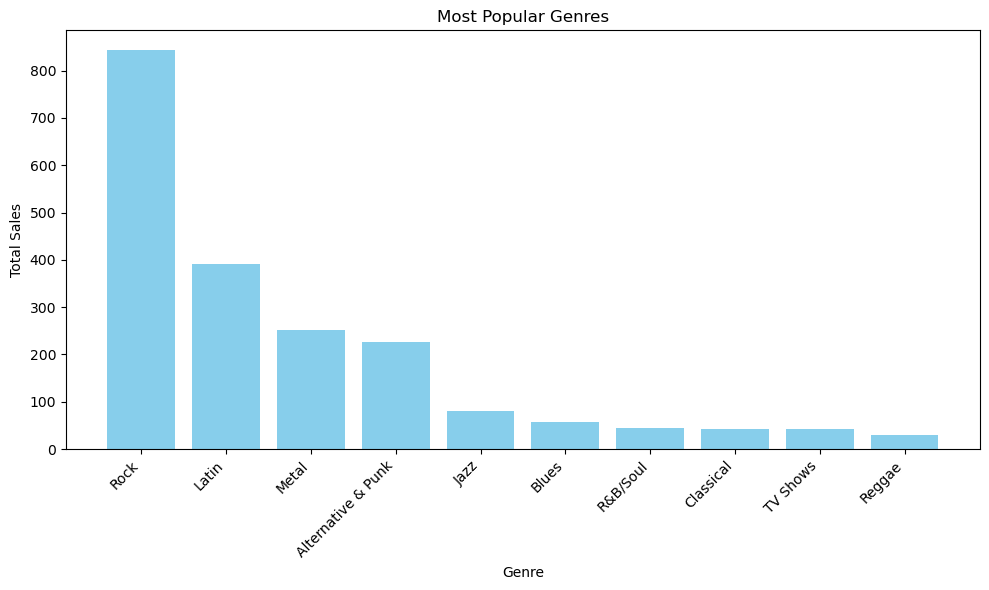

In [31]:
#Most Popular Genres

plt.figure(figsize=(10, 6))
plt.bar(most_popular_genres['Name_y'], most_popular_genres['Total_Sales'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Most Popular Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

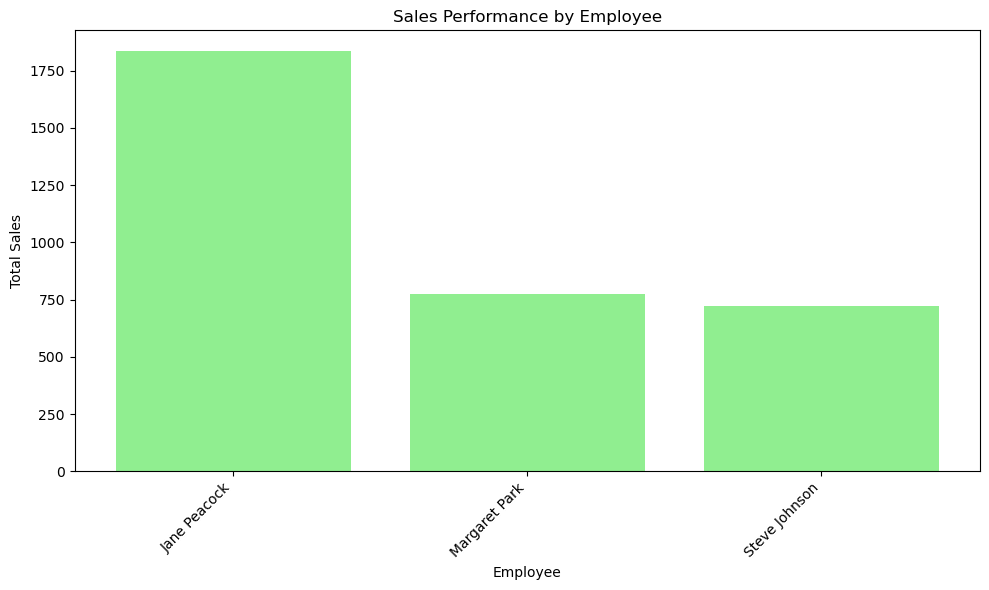

In [32]:
#Sales Performance by Employee
plt.figure(figsize=(10, 6))
employee_names = sales_performance_by_employee['FirstName_y'] + " " + sales_performance_by_employee['LastName_y']
plt.bar(employee_names, sales_performance_by_employee['Total_Sales'], color='lightgreen')
plt.xlabel('Employee')
plt.ylabel('Total Sales')
plt.title('Sales Performance by Employee')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

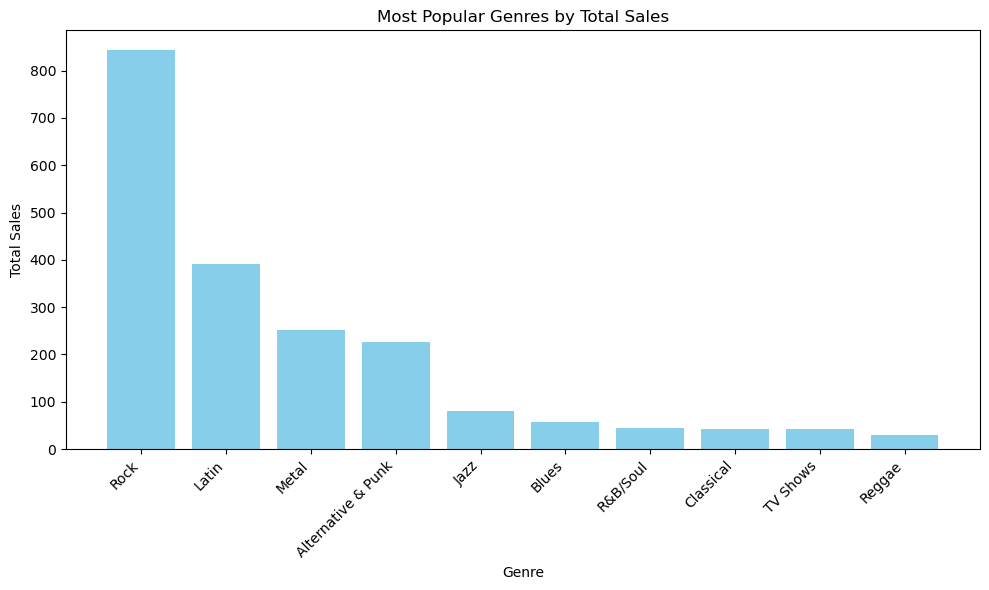

In [33]:
#Most Popular Genres

plt.figure(figsize=(10, 6))
plt.bar(most_popular_genres['Name_y'], most_popular_genres['Total_Sales'], color='skyblue')
plt.title('Most Popular Genres by Total Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()